# Exploratory Data Analysis 

### Importing Dependencies

### Data Preprocessing

In [2]:
loan_dataset = pd.read_csv('../../ML_Project/loan_approval_dataset.csv')
loan_dataset.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [3]:
# Removing Loan ID column as it is not needed for neither analysis nor prediction
loan_dataset = loan_dataset.drop('loan_id', axis=1)

In [4]:
loan_dataset.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# Trimming whitespace from column headings
loan_dataset.columns = loan_dataset.columns.str.replace(' ', '')
loan_dataset.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [6]:
loan_dataset.head(5)

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

In [7]:
loan_dataset.duplicated().sum()

0

In [8]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [9]:
# Replace loan status categorical values "Approved" and "Rejected" with "1" and "0" respectively
loan_dataset.replace(
    {
        'loan_status':{' Rejected':0, ' Approved':1},
    }, 
    inplace=True
)
loan_dataset.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  
0             22700000           8000000            1  
1              8800000           3300000            0  
2             33300000          12800000            0  
3             23300000           7900000            0  
4             29400000           5000000            0

In [10]:
loan_dataset.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  loan_status  
count      4.269000e+03  4269.000000  
mean       4.976692e+06     0.622160  
std        3.250185e+06     0.484904  
min        0.000000e+00     0.000000  
25%        2.300000e+06     0.000000  
50%        4.600000e+06     1.000000  
75%        7.100000e+06     1.000000  
max        1.470000e+07     1.000000

/Users/kedianewilson/PycharmProjects/Loan_Approval_Prediction/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


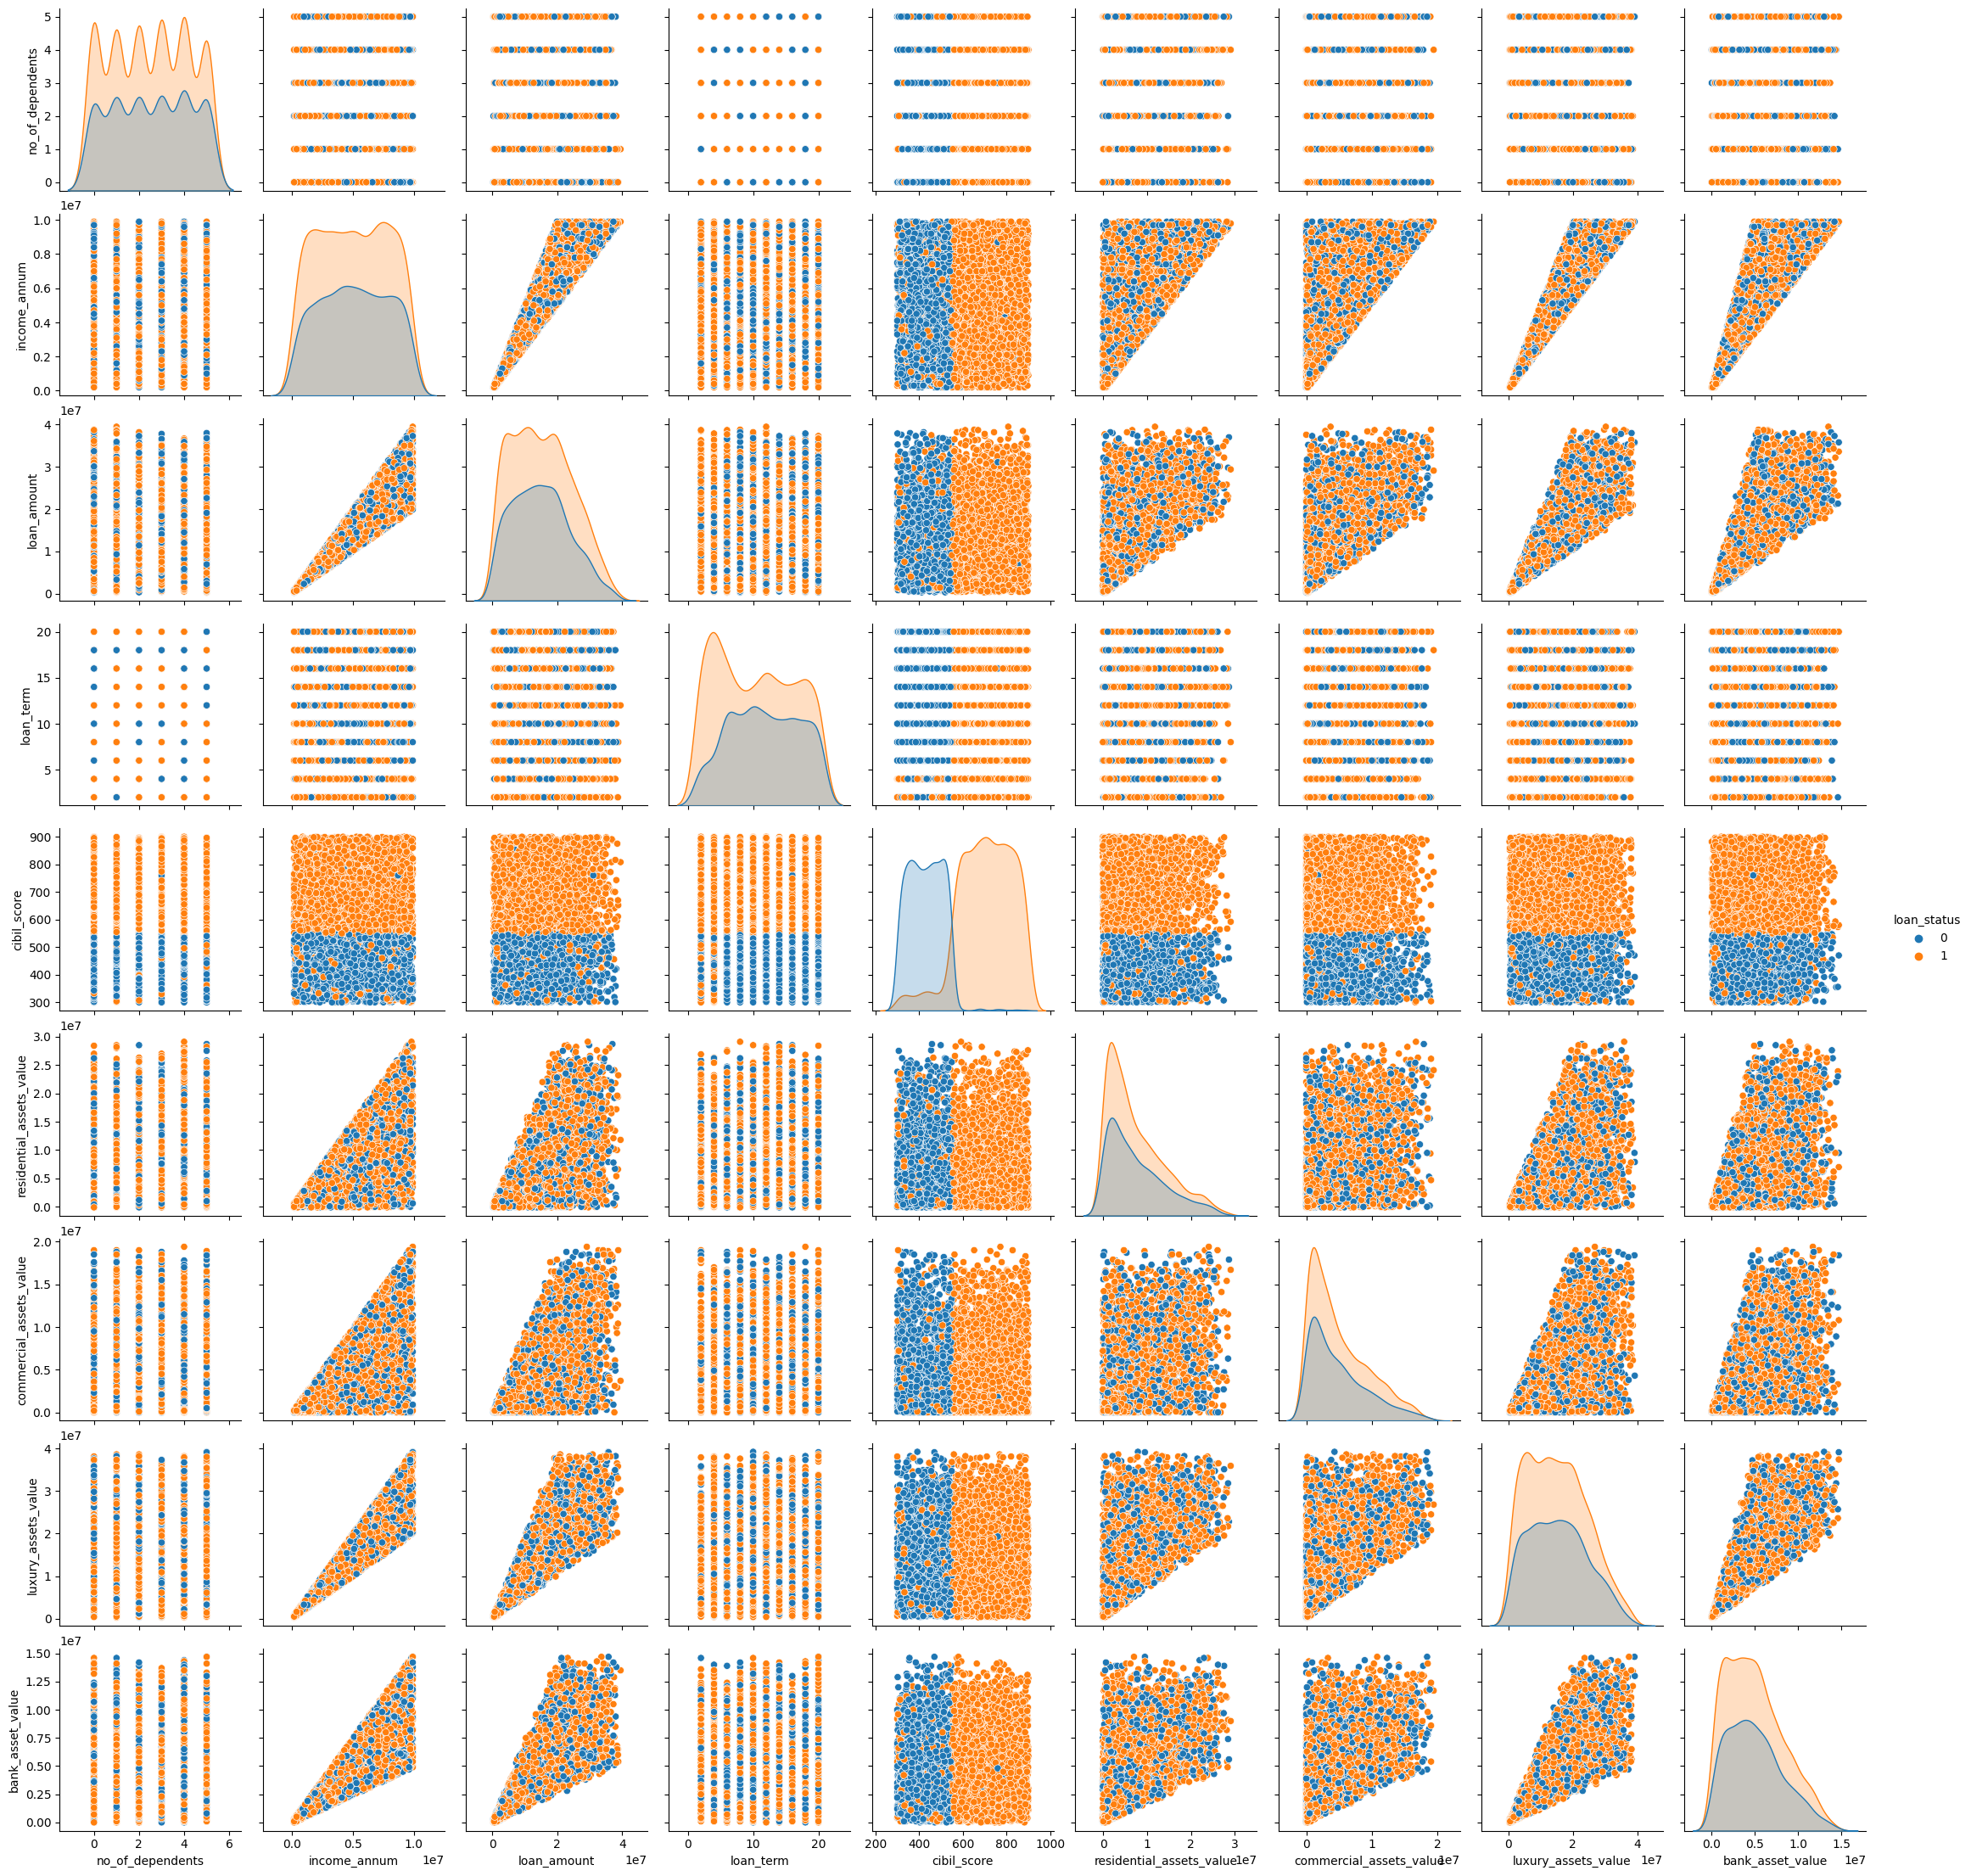

In [11]:
sns.pairplot(loan_dataset, hue ='loan_status')

#### As shown in the pairplot the dataset is imbalanced in favor of approved loan status. We will fix this by using SMOTETomek to sample the dataset 

<Axes: xlabel='education', ylabel='count'>

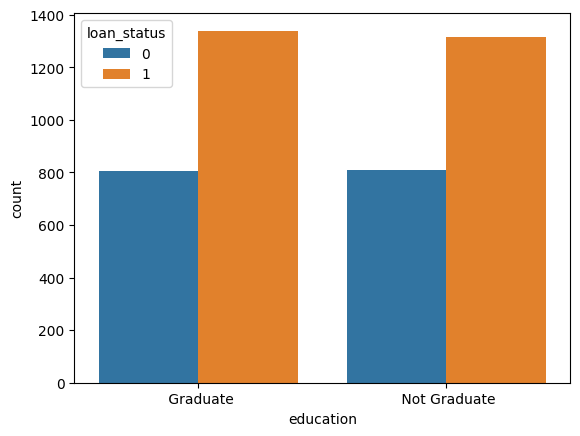

In [12]:
sns.countplot(x = 'education', hue = 'loan_status', data = loan_dataset)

#### The chart above is also shows that the dataset is imbalanced.

Text(0, 0.5, 'Loan Amount')

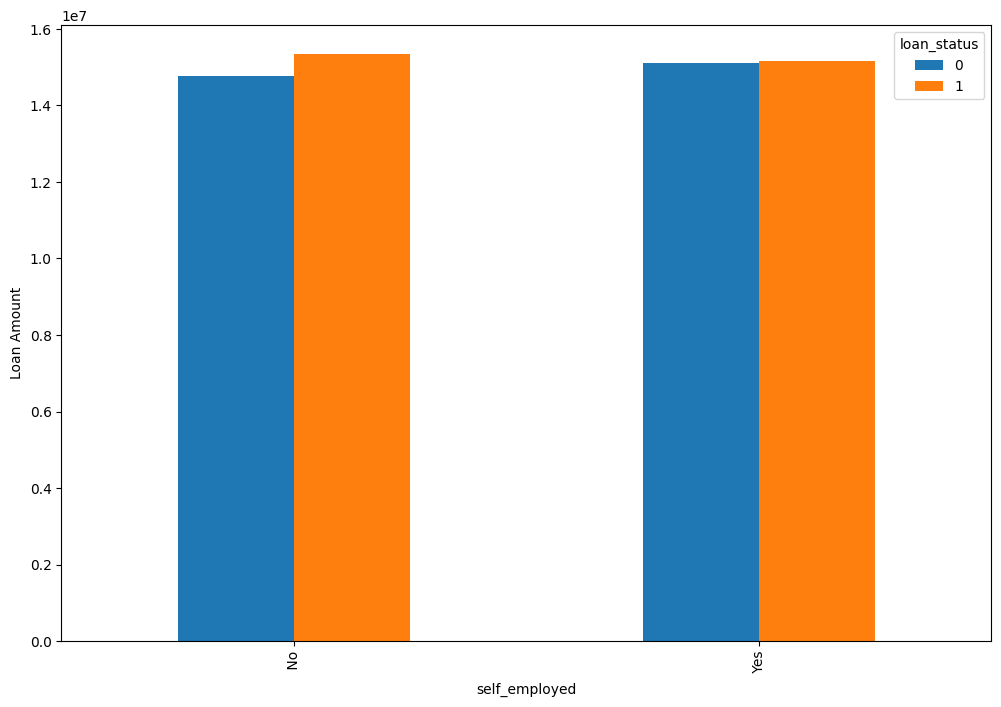

In [13]:
variable_subset2 = loan_dataset[['self_employed', 'loan_amount', 'loan_status']]

pivot_table1 = pd.pivot_table(
    variable_subset2,
    values = 'loan_amount',
    index = 'self_employed',
    columns = 'loan_status'
)
pivot_table1.plot(kind = 'bar', figsize = (12,8))
plt.ylabel('Loan Amount')                  

#### The chart above also shows the distribution of loan amount among individuals who are self-employed and not self-employed. Despite being imbalanced, loan amount and loan status is almost perfectly distrubuted among individuals who are self-employed and not self-employed. Perhaps, if we had removed this feature from the dataset, the model might have made almost the same predictions.

### Data Wrangling

In [14]:
# Label encoding categorical values
label_encoder = preprocessing.LabelEncoder()
for col in loan_dataset.columns[1:3]:
    loan_dataset[col]= label_encoder.fit_transform(loan_dataset[col])
loan_dataset.head()

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  
0             22700000           8000000            1  
1              8800000           3300000            0  
2             33300000          12800000            0  
3             23300000           7900000            0  
4             29400000           5000000            0

In [15]:
# Separate train and test data

features = loan_dataset.drop('loan_status', axis=1)
labels = loan_dataset['loan_status']
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, test_size = 0.25, random_state=42)

#### Using SMOTETomek to sample train data to account for skew in the data

In [16]:
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 1765), (1, 1765)]


#### As shown above the data is perfectly distributed among the target values for loan status. Now we can fit the sampled data to our model for accurate predictions.

# Training and Evaluation 

#### Fit data to several machine learning models, namely: Support vector machine, K-nearest neighbors, Logistic regression, Decision Trees and Random forest and print their classification reports.

In [17]:
rand_state = 42
models = [
    (SVC(kernel='rbf', random_state=rand_state), 'Support Vector Machine (RBF)'),
    (SVC(kernel='poly', random_state=rand_state), 'Support Vector Machine (Poly)'),
    (KNeighborsClassifier(), 'KNN'),
    (LogisticRegression(random_state=rand_state), 'Logistic Regression'),
    (DecisionTreeClassifier(random_state=rand_state), 'Decision Tree'),
    (RandomForestClassifier(random_state=rand_state, n_estimators=500), 'Random Forest'),
]
findings = []

for model, name in models:
    clf = model.fit(X_resampled,y_resampled)
    pred= clf.predict(X_test)
    finding = {
        'model_name': name,
        'pred': pred,
        'accuracy': accuracy_score(y_test,pred),
        'classification_report': classification_report(y_test,pred),
        'matrix': confusion_matrix(y_test,pred)
    }
    findings.append(finding)

In [18]:
for finding in findings:
    for key in finding:
        print(f'{key}: \n{finding[key]}\n')

model_name: 
Support Vector Machine (RBF)

pred: 
[1 0 0 ... 0 0 1]

accuracy: 
0.5346441947565543

classification_report: 
              precision    recall  f1-score   support

           0       0.38      0.46      0.42       390
           1       0.65      0.58      0.61       678

    accuracy                           0.53      1068
   macro avg       0.52      0.52      0.51      1068
weighted avg       0.55      0.53      0.54      1068


matrix: 
[[178 212]
 [285 393]]

model_name: 
Support Vector Machine (Poly)

pred: 
[1 1 0 ... 1 1 1]

accuracy: 
0.596441947565543

classification_report: 
              precision    recall  f1-score   support

           0       0.39      0.20      0.26       390
           1       0.64      0.83      0.72       678

    accuracy                           0.60      1068
   macro avg       0.52      0.51      0.49      1068
weighted avg       0.55      0.60      0.55      1068


matrix: 
[[ 77 313]
 [118 560]]

model_name: 
KNN

pred: 
[1 0 

#### Plot the confusion matrix for each model respectively

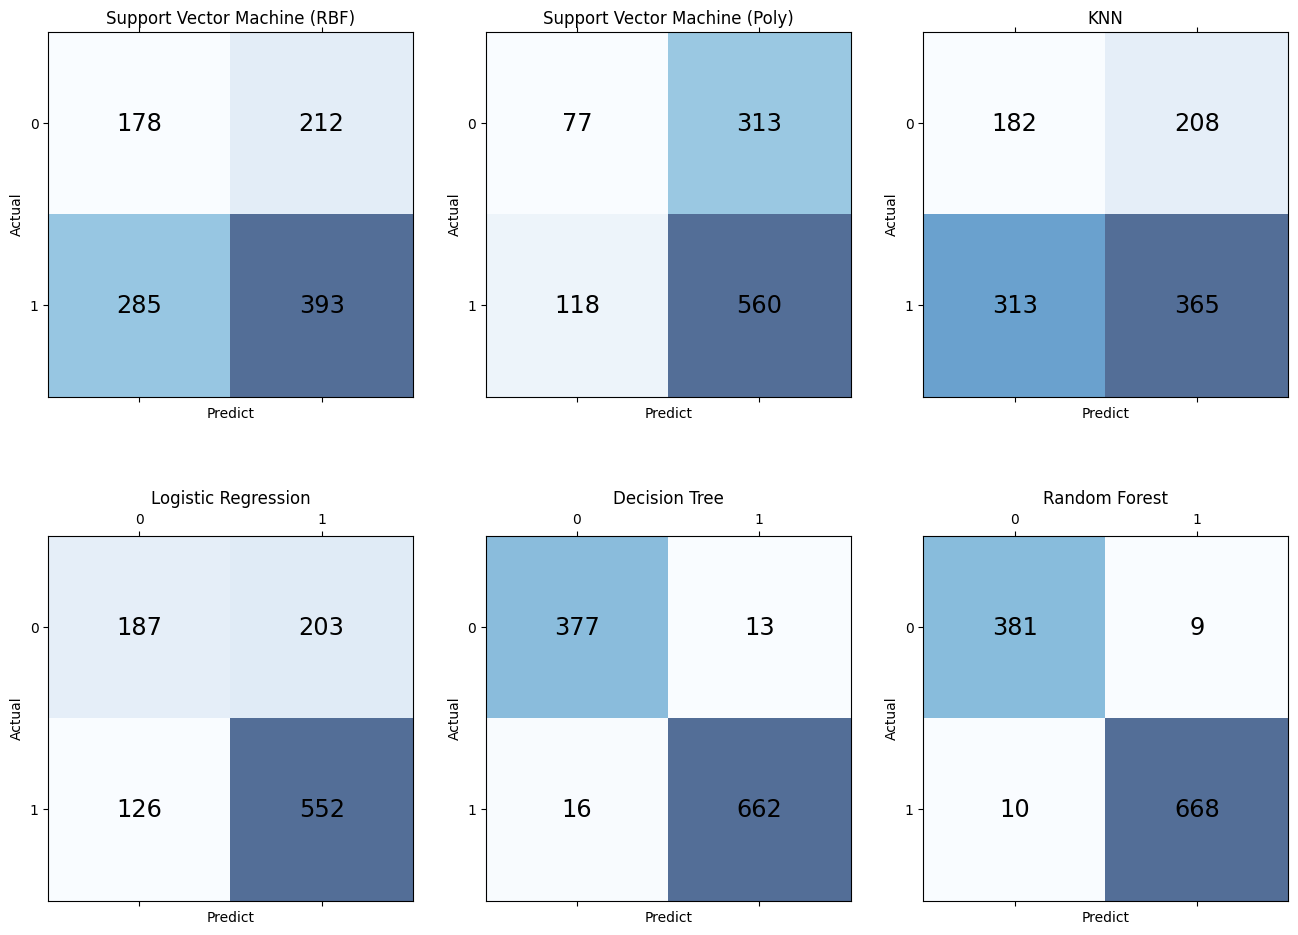

In [19]:
fig, axes = plt.subplots(2,3,sharex=True, figsize=(16,12))
best_finding = None

for i, finding in enumerate(findings):
    if best_finding is None:
        best_finding = finding
    elif finding['accuracy'] > best_finding['accuracy']:
        best_finding = finding
        
    row = min(i // 3, 1)
    col = i % 3
    axes[row][col].matshow(finding['matrix'], cmap=plt.cm.Blues, alpha=0.7)
    for i in range(finding['matrix'].shape[0]):
        for j in range(finding['matrix'].shape[1]):
            axes[row][col].text(x=j, y=i,s=finding['matrix'][i, j], va='center', ha='center', size='xx-large')
    axes[row][col].set_title(finding['model_name'])
    axes[row][col].set_xlabel("Predict")
    axes[row][col].set_ylabel("Actual")

Accuracy: 
0.9822097378277154

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       390
           1       0.99      0.99      0.99       678

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



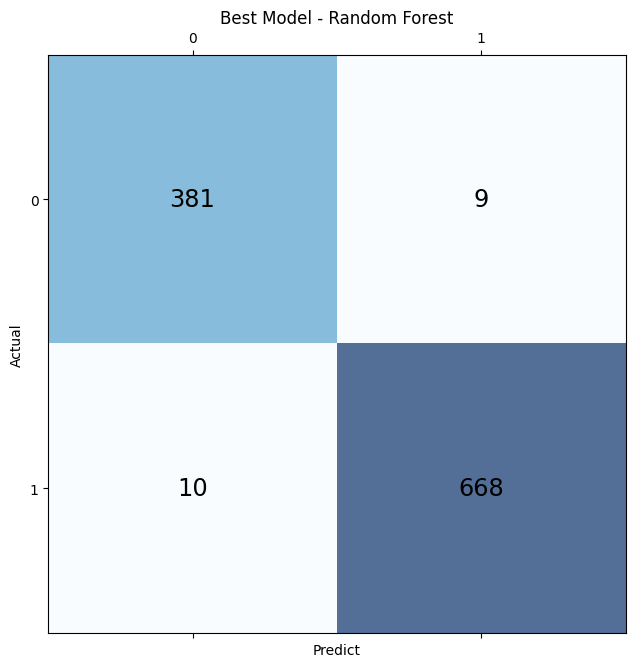

In [20]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_finding['matrix'], cmap=plt.cm.Blues, alpha=0.7)
for i in range(best_finding['matrix'].shape[0]):
    for j in range(best_finding['matrix'].shape[1]):
        ax.text(x=j, y=i,s=best_finding['matrix'][i, j], va='center', ha='center', size='xx-large')
ax.set_title(f"Best Model - {best_finding['model_name']}")
ax.set_xlabel("Predict")
ax.set_ylabel("Actual")

print(f'Accuracy: \n{best_finding["accuracy"]}\n')
print('Classification Report\n')
print(best_finding['classification_report'])

#### The model that best predicts the loan status outcome is the Ramdom Forest model